In [1]:
import os
import numpy as np
import torch
from pathlib import Path
from IPython.display import HTML
from copy import deepcopy
import numpy as np
import torch
import base64
from PIL import Image
import io
from moviepy.editor import VideoFileClip

## TODO:
1. Look at the attention heads across trajectories.
2. Conduct ablation studies on the following components:
    - Previous Action Signal (always 0??)
    - LSTM (always 0???)

In [2]:
def load_trajectory_cache(cache_path, video_path):
    if not Path(cache_path).exists():
        raise FileNotFoundError(f"Cache file {cache_path} does not exist.")
    data = torch.load(cache_path, map_location='cpu')

    clip = VideoFileClip(str(video_path))
    fps = clip.fps

    for i in range(len(data)):
        data[i]['video_frame'] = clip.get_frame(i / fps)

    return data

In [3]:
# for cache in [ep_0_cache, ep_1_cache, ep_2_cache]:
#     print(type(cache))
#     print(len(cache))
#     print(cache[0]['pi_layer_activations'].keys())
#     print(cache[0]['net_activations'].keys())
ep_0_cache = load_trajectory_cache(Path('pretrained', 'cartpole_pi_perturb', 'default', 'hook_data', 'hook_data_ep_0.pt'), Path('pretrained', 'cartpole_pi_perturb', 'default', 'videos', 'video_ep_0.mp4'))
print(f"Loaded {len(ep_0_cache)} frames from ep_0_cache")
print(list(map(lambda x: x['permutation'], ep_0_cache[:500])))

Loaded 1000 frames from ep_0_cache
[array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), array([2, 1, 4, 0, 3]), arra

## Attention Heads Over Time

In [ ]:
# # Let's plot the attention head over first few timesteps
# import matplotlib.pyplot as plt

# timesteps = 64
# shape = int(np.sqrt(timesteps))
# fig, ax = plt.subplots(figsize=(40, 40), nrows = shape, ncols = shape)
# for ts, cache in enumerate(ep_0_cache[:5 * timesteps:5]):
#     att_mat_tensor = cache['pi_layer_activations']['attention_matrix']
#     obs = np.concatenate([
#         cache['pi_layer_activations']['obs'], 
#         cache['pi_layer_activations']['prev_act']
#     ], axis = 0).squeeze()
#     obs = f'{obs[0]:.3f}, {obs[1]:.3f}, {obs[2]:.3f}, {obs[3]:.3f}'
#     # act = cache['pi_layer_activations']['act']
#     ax[ts // shape, ts % shape].imshow(att_mat_tensor, cmap='viridis', aspect='auto')
#     ax[ts // shape, ts % shape].set_title(f't={ts}, obs={obs}')#, act={cache["act"]}')
#     ax[ts // shape, ts % shape].set_xlabel('Observation Channels')
#     ax[ts // shape, ts % shape].set_ylabel('LSTM State')
#     for i in range(att_mat_tensor.shape[0]):
#         for j in range(att_mat_tensor.shape[1]):
#             ax[ts // shape, ts % shape].text(j, i, f'{att_mat_tensor[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)
#     ax[ts // shape, ts % shape].axis('off')
# plt.tight_layout()
# plt.show()

In [ ]:
# timesteps = 64
# shape = int(np.sqrt(timesteps))
# fig, ax = plt.subplots(figsize=(40, 40), nrows = shape, ncols = shape)
# for ts, cache in enumerate(ep_2_cache[:5 * timesteps:5]):
#     att_mat_tensor = cache['pi_layer_activations']['attention_matrix']
#     obs = np.concatenate([
#         cache['pi_layer_activations']['obs'], 
#         cache['pi_layer_activations']['prev_act']
#     ], axis = 0).squeeze()
#     obs = f'{obs[0]:.3f}, {obs[1]:.3f}, {obs[2]:.3f}, {obs[3]:.3f}'
#     # act = cache['pi_layer_activations']['act']
#     ax[ts // shape, ts % shape].imshow(att_mat_tensor, cmap='viridis', aspect='auto')
#     ax[ts // shape, ts % shape].set_title(f't={ts}, obs={obs}')#, act={cache["act"]}')
#     ax[ts // shape, ts % shape].set_xlabel('Observation Channels')
#     ax[ts // shape, ts % shape].set_ylabel('LSTM State')
#     for i in range(att_mat_tensor.shape[0]):
#         for j in range(att_mat_tensor.shape[1]):
#             ax[ts // shape, ts % shape].text(j, i, f'{att_mat_tensor[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)
#     ax[ts // shape, ts % shape].axis('off')
# plt.tight_layout()
# plt.show()

In [ ]:
# from IPython.display import HTML
# from copy import deepcopy

# def generate_html_slider(caches, labels, timesteps=64):
#     if not (len(caches) and isinstance(caches[0], list)):
#         caches = [caches]  # Ensure caches is a list of lists
#     if not (len(labels) and isinstance(labels, list)):
#         labels = [labels]

#     # Pad the caches to have the same length
#     max_length = max(len(cache) for cache in caches)
#     for i in range(len(caches)):
#         if len(caches[i]) < max_length:
#             # Pad with empty dictionaries if the cache is shorter than max_length
#             caches[i] += [{'pi_layer_activations': {}, 'net_activations': {}} for _ in range(max_length - len(caches[i]))]

#     # Ensure labels match caches
#     if len(labels) != len(caches):
#         labels = [f"Cache {i}" for i in range(len(caches))]
    
#     # Generate HTML
#     html = f"""
#     <!DOCTYPE html>
#     <html>
#     <head>
#         <style>
#             .container {{
#                 display: flex;
#                 flex-direction: column;
#                 align-items: center;
#                 width: 100%;
#             }}
#             .slider-container {{
#                 width: 80%;
#                 margin: 20px;
#             }}
#             .attention-maps {{
#                 display: flex;
#                 flex-wrap: wrap;
#                 justify-content: center;
#             }}
#             .attention-map {{
#                 margin: 10px;
#                 text-align: center;
#             }}
#             .map-container {{
#                 display: grid;
#                 border: 1px solid #ccc;
#                 width: 300px;
#                 height: 300px;
#             }}
#             .map-cell {{
#                 display: flex;
#                 align-items: center;
#                 justify-content: center;
#                 font-size: 12px;
#                 color: white;
#                 text-shadow: 1px 1px 1px black;
#             }}
#             .timestep-info {{
#                 margin-top: 10px;
#                 font-weight: bold;
#             }}
#         </style>
#     </head>
#     <body>
#         <div class="container">
#             <h2>Attention Maps Visualization</h2>
#             <div class="slider-container">
#                 <input type="range" min="0" max="{timesteps - 1}" value="0" class="slider" id="timestepSlider">
#                 <p>Timestep: <span id="timestepValue">0</span></p>
#             </div>
#             <div class="attention-maps" id="attentionMaps">
#             </div>
#         </div>

#         <script>
#             // Store attention data
#             const attentionData = {{}};
            
#             // Create color scale function (from blue to red)
#             function getColor(value) {{
#                 // Scale from -1 to 1
#                 const normalized = (value + 1) / 2;
                
#                 // Blue to green color scale
#                 const r = 0;
#                 const b = Math.floor((1 - normalized) * 255);
#                 const g = Math.floor(normalized * 255);
                
#                 return `rgb(${{r}}, ${{g}}, ${{b}})`;
#             }}
            
#             // Function to update attention maps
#             function updateAttentionMaps(timestep) {{
#                 const container = document.getElementById('attentionMaps');
#                 container.innerHTML = '';
                
#                 Object.keys(attentionData).forEach(label => {{
#                     const data = attentionData[label][timestep];
                    
#                     const mapDiv = document.createElement('div');
#                     mapDiv.className = 'attention-map';
                    
#                     const titleDiv = document.createElement('div');
#                     titleDiv.innerHTML = `<strong>${{label}}</strong>`;
#                     mapDiv.appendChild(titleDiv);
                    
#                     const mapContainer = document.createElement('div');
#                     mapContainer.className = 'map-container';
                    
#                     const matrix = data.matrix;
#                     const rows = matrix.length;
#                     const cols = matrix[0].length;
                    
#                     mapContainer.style.gridTemplateColumns = `repeat(${{cols}}, 1fr)`;
#                     mapContainer.style.gridTemplateRows = `repeat(${{rows}}, 1fr)`;
                    
#                     for (let i = 0; i < rows; i++) {{
#                         for (let j = 0; j < cols; j++) {{
#                             const cell = document.createElement('div');
#                             cell.className = 'map-cell';
#                             cell.textContent = matrix[i][j].toFixed(2);
#                             cell.style.backgroundColor = getColor(matrix[i][j]);
#                             mapContainer.appendChild(cell);
#                         }}
#                     }}
                    
#                     mapDiv.appendChild(mapContainer);
                    
#                     const infoDiv = document.createElement('div');
#                     infoDiv.className = 'timestep-info';
#                     infoDiv.textContent = `Obs: ${{data.obs}}, Act: ${{data.act}}`;
#                     mapDiv.appendChild(infoDiv);
                    
#                     container.appendChild(mapDiv);
#                 }});
#             }}
            
#             // Initialize data
#     """
    
#     dummy_dict = deepcopy(caches[0][0])

#     # Add data for each cache
#     html += "// Attention data\n"
    
#     for c_idx, (cache, label) in enumerate(zip(caches, labels)):
#         print(f"Processing cache for {label} with {len(cache)} timesteps.")
#         html += f"attentionData['{label}'] = ["
        
#         for ts in range(min(timesteps, len(cache))):
#             cache_item = cache[ts]
#             att_mat = cache_item.get('pi_layer_activations', {}).get('attention_matrix', torch.full_like(dummy_dict['pi_layer_activations']['attention_matrix'], fill_value = -1.)).numpy()
            
#             # Get observation values
#             obs = np.concatenate([
#                 cache_item.get('pi_layer_activations', {}).get('obs', torch.zeros_like((dummy_dict['pi_layer_activations']['obs']))).numpy(),
#                 cache_item.get('pi_layer_activations', {}).get('prev_act', torch.zeros_like((dummy_dict['pi_layer_activations']['prev_act']))).numpy()
#             ], axis=0).squeeze()
#             obs_str = ', '.join([f'{o:.3f}' for o in obs])
            
#             # Convert attention matrix to JavaScript array
#             matrix_js = "["
#             for i in range(att_mat.shape[0]):
#                 row = "["
#                 for j in range(att_mat.shape[1]):
#                     row += f"{float(att_mat[i, j]):.4f}"
#                     if j < att_mat.shape[1] - 1:
#                         row += ", "
#                 row += "]"
#                 if i < att_mat.shape[0] - 1:
#                     row += ", "
#                 matrix_js += row
#             matrix_js += "]"

#             act_value = f"{float(cache_item.get('act', np.zeros_like((dummy_dict['act'])))):.4f}"

#             html += f"{{'matrix': {matrix_js}, 'obs': '{obs_str}', 'act': '{act_value}'}}"
#             if ts < min(timesteps, len(cache)) - 1:
#                 html += ", "
        
#         html += "];\n"
    
#     # Complete the HTML with event listener for slider
#     html += """
#             // Set up slider
#             const slider = document.getElementById('timestepSlider');
#             const output = document.getElementById('timestepValue');
            
#             slider.oninput = function() {
#                 const timestep = parseInt(this.value);
#                 output.textContent = timestep;
#                 updateAttentionMaps(timestep);
#             }
            
#             // Initial update
#             updateAttentionMaps(0);
#         </script>
#     </body>
#     </html>
#     """
#     with open("test.html", "w") as f:
#         f.write(html)

# # Generate and display the HTML slider for the first episode
# generate_html_slider([ep_0_cache, ep_1_cache, ep_2_cache], ["Episode 0", "Episode 1", "Episode 2"], timesteps = 1000)
# # generate_html_slider([ep_0_cache], ["Episode 0"], timesteps=64)
# # generate_html_slider(ep_2_cache, "Episode 2", timesteps=64)
# # display(html_slider)

In [ ]:
# # Generate like.
# # A MASSIVE number of caches.
# # And cook a HTML file to keep them all.

# EPISODE = 0

# caches = {}
# for row in range(15):
#     caches[f'row_{row}'] = load_trajectory_cache(Path("pretrained", "cartpole_pi_ablate_test", f"ablation_row_{row}", "hook_data", f"hook_data_ep_{EPISODE}.pt"))

# for col in range(4):
#     caches[f'col_{col}'] = load_trajectory_cache(Path("pretrained", "cartpole_pi_ablate_test", f"ablation_col_{col}", "hook_data", f"hook_data_ep_{EPISODE}.pt"))

# generate_html_slider(list(caches.values()), list(caches.keys()), timesteps=1000)

In [4]:
# Data Processing Module
def normalize_caches(caches):
    """Ensure caches is a list of lists with consistent structure."""
    if not (len(caches) and isinstance(caches[0], list)):
        caches = [caches]
    return caches

# def pad_caches_to_same_length(caches):
#     """Pad all caches to have the same length using empty dictionaries."""
#     max_length = max(len(cache) for cache in caches)
#     padded_caches = []
    
#     for cache in caches:
#         padded_cache = cache.copy()
#         if len(padded_cache) < max_length:
#             padding = [
#                 {'pi_layer_activations': {}, 'net_activations': {}} 
#                 for _ in range(max_length - len(padded_cache))
#             ]
#             padded_cache.extend(padding)
#         padded_caches.append(padded_cache)
    
#     return padded_caches

def pad_cache(caches, length = 1000):
    """Pad all caches to have the same length using empty dictionaries."""
    padded_caches = []
    
    for cache in caches:
        padded_cache = cache.copy()
        if len(padded_cache) < length:
            padding = [
                {'pi_layer_activations': {}, 'net_activations': {}} 
                for _ in range(length - len(padded_cache))
            ]
            padded_cache.extend(padding)
        padded_caches.append(padded_cache)
    
    return padded_caches

def generate_labels(caches, provided_labels):
    """Generate appropriate labels for caches."""
    if not (len(provided_labels) and isinstance(provided_labels, list)):
        provided_labels = [provided_labels]
    
    if len(provided_labels) != len(caches):
        return [f"Cache {i}" for i in range(len(caches))]
    
    return provided_labels

# Data Extraction Module
def extract_attention_matrix(cache_item, dummy_dict):
    """Extract attention matrix from cache item with fallback."""
    att_mat = cache_item.get('pi_layer_activations', {}).get(
        'attention_matrix', 
        torch.full_like(dummy_dict['pi_layer_activations']['attention_matrix'], fill_value=-1.)
    ).numpy()

    # Use the permutation information to format the observation data
    # perm = cache_item.get('permutation', np.arange(att_mat.shape[-1]))  # Fallback to identity permutation if not available
    # inv_perm = np.argsort(perm)

    # att_mat = att_mat[:, perm]  # Apply inverse permutation to the attention matrix
    return att_mat

def extract_observation_data(cache_item, dummy_dict):
    """Extract and format observation data."""
    obs = np.concatenate([
        cache_item.get('pi_layer_activations', {}).get(
            'obs', 
            torch.zeros_like(dummy_dict['pi_layer_activations']['obs'])
        ).numpy(),
        cache_item.get('pi_layer_activations', {}).get(
            'prev_act', 
            torch.zeros_like(dummy_dict['pi_layer_activations']['prev_act'])
        ).numpy()
    ], axis=0).squeeze()[:6]
    # assert obs.shape[0] == 6, f"Observation data shape mismatch: {obs.shape}, expected 6 elements."

    # Use the permutation information to format the observation data
    perm = cache_item.get('permutation', np.arange(5))  # Fallback to identity permutation if not available
    inv_perm = np.argsort(perm)
    # assert ((obs[inv_perm])[perm] == obs[:-1]).all(), f"Observation data permutation mismatch: {(obs[inv_perm])[perm]} != {obs[:-1]}, {perm=}, {inv_perm=}, {perm[inv_perm]=}"
    assert perm.shape[0] == 5, f"Permutation data shape mismatch: {perm} {perm.shape}, expected 5 elements."

    obs = np.concatenate([obs[inv_perm], obs[-1:]])  # Ensure the last element is included
    assert obs.shape[0] == 6, f"Observation data shape mismatch: {obs.shape}, expected 6 elements."

    return ', '.join([f'{o:.4f}' for o in obs])

def extract_output_value(cache_item, dummy_dict):
    """Extract output value with fallback."""
    output = cache_item.get('pi_layer_activations', {}).get('output', torch.zeros_like(dummy_dict['pi_layer_activations']['output'])).numpy().squeeze()

    # return ', '.join([f'{o:.4f}' for o in output])
    return output

def extract_action_value(cache_item, dummy_dict):
    """Extract action value with fallback."""
    return f"{float(cache_item.get('act', np.zeros_like(dummy_dict['act']))):.4f}"


def extract_video_frame(cache_item):
    """Extract video frame from cache item if available."""
    return cache_item.get('video_frame', None)

# Video Frame Processing Module
def numpy_to_base64_image(frame_array):
    """Convert numpy array to base64 encoded image string."""
    if frame_array is None:
        return None
    
    # Ensure the array is in the right format (0-255, uint8)
    if frame_array.dtype != np.uint8:
        # Normalize to 0-255 if needed
        if frame_array.max() <= 1.0:
            frame_array = (frame_array * 255).astype(np.uint8)
        else:
            frame_array = frame_array.astype(np.uint8)
    
    # Handle different array shapes
    if len(frame_array.shape) == 3:
        # RGB image
        if frame_array.shape[2] == 3:
            mode = 'RGB'
        elif frame_array.shape[2] == 4:
            mode = 'RGBA'
        else:
            raise ValueError(f"Unsupported number of channels: {frame_array.shape[2]}")
    elif len(frame_array.shape) == 2:
        # Grayscale image
        mode = 'L'
    else:
        raise ValueError(f"Unsupported array shape: {frame_array.shape}")
    
    # Convert to PIL Image
    pil_image = Image.fromarray(frame_array, mode=mode)
    
    # Convert to base64
    buffer = io.BytesIO()
    pil_image.save(buffer, format='PNG')
    img_str = base64.b64encode(buffer.getvalue()).decode()
    
    return f"data:image/png;base64,{img_str}"

# JavaScript Generation Module
def matrix_to_javascript_array(matrix):
    """Convert numpy matrix to JavaScript array string."""

    matrix_js = "["
    for i in range(matrix.shape[0]):
        row = "["
        for j in range(matrix.shape[1]):
            row += f"{float(matrix[i, j]):.4f}"
            if j < matrix.shape[1] - 1:
                row += ", "
        row += "]"
        if i < matrix.shape[0] - 1:
            row += ", "
        matrix_js += row
    matrix_js += "]"
    return matrix_js

def generate_cache_data_js(cache, label, dummy_dict, timesteps):
    """Generate JavaScript data for a single cache."""
    print(f"Processing cache for {label} with {len(cache)} timesteps.")
    
    js_data = f"attentionData['{label}'] = ["
    
    for ts in range(min(timesteps, len(cache))):
        cache_item = cache[ts]
        
        # Extract data using dedicated functions
        att_mat = extract_attention_matrix(cache_item, dummy_dict)
        obs_str = extract_observation_data(cache_item, dummy_dict)
        act_value = extract_action_value(cache_item, dummy_dict)
        output = extract_output_value(cache_item, dummy_dict)
        video_frame = extract_video_frame(cache_item)

        att_mat = np.concatenate([
            att_mat,
            output.reshape(-1, 1)  # Append output as the last column
        ], axis = 1)
        
        # Convert to JavaScript format
        matrix_js = matrix_to_javascript_array(att_mat)
        
        # Convert video frame to base64 if available
        frame_data = "null"
        if video_frame is not None:
            base64_image = numpy_to_base64_image(video_frame)
            if base64_image:
                frame_data = f"'{base64_image}'"
        
        js_data += f"{{'matrix': {matrix_js}, 'obs': '{obs_str}', 'act': '{act_value}', 'video_frame': {frame_data}, 'perm': '{cache_item.get('permutation', np.arange(att_mat.shape[-1]))}'}}"
        if ts < min(timesteps, len(cache)) - 1:
            js_data += ", "
    
    js_data += "];\n"
    return js_data

# HTML Template Module
def get_html_template(timesteps):
    """Generate the HTML template with CSS and basic structure."""
    return f"""
    <!DOCTYPE html>
    <html>
    <head>
        <style>
            .container {{
                display: flex;
                flex-direction: column;
                align-items: center;
                width: 100%;
                padding: 20px;
            }}
            .controls-container {{
                width: 80%;
                margin: 20px;
                text-align: center;
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                border-radius: 15px;
                padding: 20px;
                box-shadow: 0 4px 15px rgba(0,0,0,0.2);
            }}
            .slider-section {{
                margin-bottom: 20px;
            }}
            .slider {{
                width: 100%;
                height: 8px;
                border-radius: 5px;
                background: rgba(255,255,255,0.3);
                outline: none;
                margin: 10px 0;
            }}
            .slider::-webkit-slider-thumb {{
                appearance: none;
                width: 20px;
                height: 20px;
                border-radius: 50%;
                background: #fff;
                cursor: pointer;
                box-shadow: 0 2px 5px rgba(0,0,0,0.3);
            }}
            .timestep-display {{
                color: white;
                font-size: 18px;
                font-weight: bold;
                margin: 10px 0;
            }}
            .play-controls {{
                display: flex;
                justify-content: center;
                align-items: center;
                gap: 15px;
                margin-top: 15px;
            }}
            .play-btn, .speed-btn {{
                background: rgba(255,255,255,0.2);
                border: 2px solid rgba(255,255,255,0.5);
                border-radius: 8px;
                color: white;
                padding: 10px 20px;
                cursor: pointer;
                font-size: 16px;
                font-weight: bold;
                transition: all 0.3s ease;
                backdrop-filter: blur(10px);
            }}
            .play-btn:hover, .speed-btn:hover {{
                background: rgba(255,255,255,0.3);
                border-color: rgba(255,255,255,0.8);
                transform: translateY(-2px);
            }}
            .play-btn.playing {{
                background: rgba(255,0,0,0.3);
                border-color: rgba(255,0,0,0.8);
            }}
            .speed-display {{
                color: white;
                font-size: 14px;
                min-width: 60px;
            }}
            .loading-indicator {{
                color: white;
                font-size: 14px;
                margin-top: 10px;
                display: none;
            }}
            .loading-indicator.show {{
                display: block;
            }}
            .attention-table {{
                border-collapse: collapse;
                margin: 20px 0;
                width: 100%;
                max-width: 1400px;
                background: white;
                border-radius: 10px;
                overflow: hidden;
                box-shadow: 0 4px 15px rgba(0,0,0,0.1);
            }}
            .attention-table th, .attention-table td {{
                border: 1px solid #ddd;
                padding: 15px;
                text-align: center;
                vertical-align: top;
            }}
            .attention-table th {{
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                color: white;
                font-weight: bold;
                font-size: 16px;
            }}
            .cache-row {{
                width: 50px
                background-color: #fafafa;
                transition: background-color 0.3s ease;
            }}
            .cache-row:nth-child(even) {{
                background-color: #f5f5f5;
            }}
            .cache-row:hover {{
                background-color: #e8f4f8;
            }}
            .attention-content {{
                display: flex;
                align-items: flex-start;
                justify-content: center;
                gap: 10px;
            }}
            .attention-map {{
                text-align: center;
            }}
            .map-container {{
                display: grid;
                border: 2px solid #ddd;
                border-radius: 8px;
                width: 400px;
                height: 300px;
                margin: 0 auto;
                overflow: hidden;
                box-shadow: 0 2px 8px rgba(0,0,0,0.1);
            }}
            .map-cell {{
                display: flex;
                align-items: center;
                justify-content: center;
                font-size: 10px;
                color: white;
                text-shadow: 1px 1px 1px black;
                font-weight: bold;
            }}
            .video-frame {{
                text-align: center;
            }}
            .video-frame img {{
                max-width: 250px;
                max-height: 250px;
                border: 2px solid #ddd;
                border-radius: 8px;
                box-shadow: 0 2px 8px rgba(0,0,0,0.1);
            }}
            .info-section {{
                margin-top: 10px;
                font-size: 16px;
                max-width: 400px;
                word-wrap: break-word;
                background: #f8f9fa;
                padding: 10px;
                border-radius: 8px;
            }}
            .timestep-info {{
                font-weight: bold;
                margin-bottom: 5px;
                color: #495057;
            }}
            .cache-label {{
                font-size: 16px;
                font-weight: bold;
                color: #495057;
            }}
            .timestep-tables {{
                width: 100%;
                max-width: 1400px;
            }}
            .timestep-table {{
                display: none;
            }}
            .timestep-table.active {{
                display: block;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <h2 style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); -webkit-background-clip: text; -webkit-text-fill-color: transparent; font-size: 32px; margin-bottom: 30px;">Attention Maps Visualization</h2>
            
            <div class="controls-container">
                <div class="slider-section">
                    <input type="range" min="0" max="{timesteps - 1}" value="0" class="slider" id="timestepSlider">
                    <div class="timestep-display">Timestep: <span id="timestepValue">0</span> / {timesteps - 1}</div>
                </div>
                
                <div class="play-controls">
                    <button class="play-btn" id="playBtn">▶ Play</button>
                    <button class="speed-btn" id="speedBtn">1x</button>
                    <div class="speed-display">Speed: <span id="speedValue">5x</span></div>
                </div>
                
                <div class="loading-indicator" id="loadingIndicator">
                    <div>⏳ Pre-loading all timesteps...</div>
                    <div id="loadingProgress">0%</div>
                </div>
            </div>
            
            <div class="timestep-tables" id="timestepTables">
                <!-- Tables will be pre-generated here -->
            </div>
        </div>

        <script>
            // Store attention data and pre-built tables
            const attentionData = {{}};
            let prebuiltTables = {{}};
            let currentTimestep = 0;
            let isPlaying = false;
            let playInterval = null;
            let playSpeed = 5;
            const speedOptions = [1, 2.5, 5, 10, 25];
            let currentSpeedIndex = 2; // Start at 5 FPS
            const maxTimesteps = {timesteps};
            
            // Create color scale function (from blue to green)
            function getColor(value) {{
                // Scale from -1 to 1
                const normalized = (value + 1) / 2;
                
                // Blue to green color scale
                const r = 0;
                const b = Math.floor((1 - normalized) * 255);
                const g = Math.floor(normalized * 255);
                
                return `rgb(${{r}}, ${{g}}, ${{b}})`;
            }}
            
            // Function to create a table for a specific timestep
            function createTimestepTable(timestep) {{
                const table = document.createElement('table');
                table.className = 'attention-table timestep-table';
                table.id = `table-${{timestep}}`;
                
                // Create header
                const thead = document.createElement('thead');
                const headerRow = document.createElement('tr');
                ['Cache', 'Attention Map', 'Video Frame', 'Info'].forEach(header => {{
                    const th = document.createElement('th');
                    th.textContent = header;
                    headerRow.appendChild(th);
                }});
                thead.appendChild(headerRow);
                table.appendChild(thead);
                
                // Create body
                const tbody = document.createElement('tbody');
                
                Object.keys(attentionData).forEach(label => {{
                    const data = attentionData[label][timestep];
                    
                    // Create table row
                    const row = document.createElement('tr');
                    row.className = 'cache-row';
                    
                    // Cache label cell
                    const labelCell = document.createElement('td');
                    labelCell.innerHTML = `<div class="cache-label">${{label}}</div>`;
                    row.appendChild(labelCell);
                    
                    // Attention map cell
                    const mapCell = document.createElement('td');
                    const mapDiv = document.createElement('div');
                    mapDiv.className = 'attention-map';
                    
                    const mapContainer = document.createElement('div');
                    mapContainer.className = 'map-container';
                    
                    const matrix = data.matrix;
                    const rows = matrix.length;
                    const cols = matrix[0].length;
                    
                    mapContainer.style.gridTemplateColumns = `repeat(${{cols}}, 1fr)`;
                    mapContainer.style.gridTemplateRows = `repeat(${{rows}}, 1fr)`;
                    
                    for (let i = 0; i < rows; i++) {{
                        for (let j = 0; j < cols; j++) {{
                            const cell = document.createElement('div');
                            cell.className = 'map-cell';
                            cell.textContent = matrix[i][j].toFixed(2);
                            cell.style.backgroundColor = getColor(matrix[i][j]);
                            mapContainer.appendChild(cell);
                        }}
                    }}
                    
                    mapDiv.appendChild(mapContainer);
                    mapCell.appendChild(mapDiv);
                    row.appendChild(mapCell);
                    
                    // Video frame cell
                    const frameCell = document.createElement('td');
                    if (data.video_frame && data.video_frame !== null) {{
                        const frameDiv = document.createElement('div');
                        frameDiv.className = 'video-frame';
                        const img = document.createElement('img');
                        img.src = data.video_frame;
                        img.alt = 'Video Frame';
                        frameDiv.appendChild(img);
                        frameCell.appendChild(frameDiv);
                    }} else {{
                        frameCell.innerHTML = '<em>No video frame</em>';
                    }}
                    row.appendChild(frameCell);
                    
                    // Info cell
                    const infoCell = document.createElement('td');
                    const infoDiv = document.createElement('div');
                    infoDiv.className = 'info-section';
                    
                    const timestepInfo = document.createElement('div');
                    timestepInfo.className = 'timestep-info';
                    timestepInfo.textContent = `Timestep: ${{timestep}}`;
                    infoDiv.appendChild(timestepInfo);
                    
                    const obsInfo = document.createElement('div');
                    obsInfo.innerHTML = `<strong>Obs:</strong> ${{data.obs}}`;
                    infoDiv.appendChild(obsInfo);

                    const actInfo = document.createElement('div');
                    actInfo.innerHTML = `<strong>Act:</strong> ${{data.act}}`;
                    infoDiv.appendChild(actInfo);

                    const permInfo = document.createElement('div');
                    permInfo.innerHTML = `<strong>Perm:</strong> ${{data.perm}}`;
                    infoDiv.appendChild(permInfo);
                    
                    infoCell.appendChild(infoDiv);
                    row.appendChild(infoCell);
                    
                    tbody.appendChild(row);
                }});
                
                table.appendChild(tbody);
                return table;
            }}
            
            // Function to show specific timestep
            function showTimestep(timestep) {{
                // Hide all tables
                Object.values(prebuiltTables).forEach(table => {{
                    table.classList.remove('active');
                }});
                
                // Show target table
                if (prebuiltTables[timestep]) {{
                    prebuiltTables[timestep].classList.add('active');
                }}
                
                // Update slider and display
                document.getElementById('timestepSlider').value = timestep;
                document.getElementById('timestepValue').textContent = timestep;
                currentTimestep = timestep;
            }}
            
            // Pre-build all tables
            function preloadAllTables() {{
                const loadingIndicator = document.getElementById('loadingIndicator');
                const loadingProgress = document.getElementById('loadingProgress');
                const tablesContainer = document.getElementById('timestepTables');
                
                loadingIndicator.classList.add('show');
                
                for (let i = 0; i < maxTimesteps; i++) {{
                    setTimeout(() => {{
                        const table = createTimestepTable(i);
                        prebuiltTables[i] = table;
                        tablesContainer.appendChild(table);
                        
                        const progress = Math.round(((i + 1) / maxTimesteps) * 100);
                        loadingProgress.textContent = `${{progress}}%`;
                        
                        if (i === 0) {{
                            showTimestep(0);
                        }}
                        
                        if (i === maxTimesteps - 1) {{
                            loadingIndicator.classList.remove('show');
                        }}
                    }}, i * 10); // Small delay to prevent UI blocking
                }}
            }}
            
            // Play functionality
            function togglePlay() {{
                const playBtn = document.getElementById('playBtn');
                
                if (isPlaying) {{
                    // Stop playing
                    clearInterval(playInterval);
                    isPlaying = false;
                    playBtn.textContent = '▶ Play';
                    playBtn.classList.remove('playing');
                }} else {{
                    // Start playing
                    isPlaying = true;
                    playBtn.textContent = '⏸ Pause';
                    playBtn.classList.add('playing');
                    
                    playInterval = setInterval(() => {{
                        if (currentTimestep >= maxTimesteps - 1) {{
                            currentTimestep = 0;
                        }} else {{
                            currentTimestep++;
                        }}
                        showTimestep(currentTimestep);
                    }}, 1000 / playSpeed);
                }}
            }}
            
            // Speed control
            function changeSpeed() {{
                currentSpeedIndex = (currentSpeedIndex + 1) % speedOptions.length;
                playSpeed = speedOptions[currentSpeedIndex];
                document.getElementById('speedValue').textContent = `${{playSpeed}}x`;
                
                // Restart interval if playing
                if (isPlaying) {{
                    clearInterval(playInterval);
                    playInterval = setInterval(() => {{
                        if (currentTimestep >= maxTimesteps - 1) {{
                            currentTimestep = 0;
                        }} else {{
                            currentTimestep++;
                        }}
                        showTimestep(currentTimestep);
                    }}, 1000 / playSpeed);
                }}
            }}
            
            // Initialize data
    """

def get_html_footer():
    """Generate the HTML footer with event handlers."""
    return """
            // Set up event listeners
            document.getElementById('timestepSlider').addEventListener('input', function() {
                const timestep = parseInt(this.value);
                showTimestep(timestep);
                
                // Stop playing if user manually changes timestep
                if (isPlaying) {
                    togglePlay();
                }
            });
            
            document.getElementById('playBtn').addEventListener('click', togglePlay);
            document.getElementById('speedBtn').addEventListener('click', changeSpeed);
            
            // Keyboard controls
            document.addEventListener('keydown', function(e) {
                switch(e.key) {
                    case ' ':
                        e.preventDefault();
                        togglePlay();
                        break;
                    case 'ArrowLeft':
                        e.preventDefault();
                        if (currentTimestep > 0) {
                            showTimestep(currentTimestep - 1);
                        }
                        break;
                    case 'ArrowRight':
                        e.preventDefault();
                        if (currentTimestep < maxTimesteps - 1) {
                            showTimestep(currentTimestep + 1);
                        }
                        break;
                }
            });
            
            // Start preloading after data is loaded
            setTimeout(preloadAllTables, 100);
        </script>
    </body>
    </html>
    """

# File I/O Module
def save_html_to_file(html_content, filename="test.html"):
    """Save HTML content to file."""
    with open(filename, "w") as f:
        f.write(html_content)

# # Main Orchestration Function
# def generate_html_slider(caches, labels, timesteps=64, output_file="test.html"):
#     """
#     Generate an interactive HTML slider for visualizing attention maps with video frames.
    
#     Args:
#         caches: List of cache data or single cache
#         labels: List of labels or single label
#         timesteps: Number of timesteps to include
#         output_file: Output HTML filename
#     """
#     # Data preprocessing
#     caches = normalize_caches(caches)
#     caches = pad_caches_to_same_length(caches)
#     labels = generate_labels(caches, labels)
    
#     # Generate HTML template
#     html = get_html_template(timesteps)
    
#     # Create dummy template for fallback values
#     dummy_dict = deepcopy(caches[0][0])
    
#     # Generate JavaScript data for each cache
#     html += "// Attention data\n"
#     for cache, label in zip(caches, labels):
#         html += generate_cache_data_js(cache, label, dummy_dict, timesteps)
    
#     # Add HTML footer
#     html += get_html_footer()
    
#     # Save to file
#     save_html_to_file(html, output_file)
    
#     return html

# ep_cache = []
# for i in range(30):
#     ep_cache.append(load_trajectory_cache(Path("pretrained", "cartpole_pi_clean", "default", "hook_data", f"hook_data_ep_{i}.pt")))

# # Generate and display the HTML slider for multiple episodes
# generate_html_slider(
#     ep_cache,
#     [f"Episode {i}" for i in range(30)],
#     timesteps=1000,
#     output_file="lstm_ablate.html"
# )


# Main Orchestration Function
def generate_html_slider(paths, video_paths, labels, timesteps=64, output_file="test.html"):
    """
    Generate an interactive HTML slider for visualizing attention maps with video frames.
    
    Args:
        paths: List of cache data or single cache
        labels: List of labels or single label
        timesteps: Number of timesteps to include
        output_file: Output HTML filename
    """
    
    # Generate HTML template and dummy dictionary.
    html = [get_html_template(timesteps)]
    dummy_dict = None

    # To save memory, we load each cache sequentially.
    for i, (path, v_path, label) in enumerate(zip(paths, video_paths, labels)):
        cache = load_trajectory_cache(path, video_path = v_path)
        if dummy_dict is None:
            dummy_dict = deepcopy(cache[0])
            # print(dummy_dict.keys())

        # Normalize and pad the cache
        cache = normalize_caches(cache)
        # Pad the cache to 1000 steps.
        cache = pad_cache(cache)[0]
        
        # Generate JavaScript data for each cache
        html.append("// Attention data\n")
        html.append(generate_cache_data_js(cache, label, dummy_dict, timesteps))

        # Once done, delete cache.
        del cache
    
    # Add HTML footer
    html.append(get_html_footer())
    html = ''.join(html)

    # Save to file
    save_html_to_file(html, output_file)

# generate_html_slider(
#     # paths = [Path(
#     #         "pretrained", "cartpole_pi_ablate_test", f"ablation_row_{i}", "hook_data", f"hook_data_ep_0.pt"
#     #     ) 
#     #     for i in range(15)
#     # ] + [Path(
#     #     "pretrained", "cartpole_pi_ablate_test", f"ablation_col_{i}", "hook_data", f"hook_data_ep_0.pt") for i in range(4)],
#     paths = [
#         Path(
#             "pretrained", "cartpole_pi_clean", "default", "hook_data", f"hook_data_ep_{i}.pt"
#         ) for i in range(30)
#     ],
#     video_paths = [
#         Path(
#             "pretrained", "cartpole_pi_clean", "default", "videos", f"video_ep_{i}.mp4"
#         ) for i in range(30)
#     ],
#     labels=[f"Episode {i}" for i in range(30)],
#     timesteps=1000,
#     # output_file="lstm_ablate.html"
# )

In [6]:

generate_html_slider(
    paths = sum([[
        Path(
                "pretrained", "cartpole_pi_clean", "default", "hook_data", f"hook_data_ep_{ep}.pt"
            ),
        Path(
            "pretrained", "cartpole_pi_perturb", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
        Path(
            "pretrained", "cartpole_pi_perturb_new_seed", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        )
    ] for ep in range(10)], []),
    video_paths = sum([[
        Path(
                "pretrained", "cartpole_pi_clean", "default", "videos", f"video_ep_{ep}.mp4"
            ),
        Path(
            "pretrained", "cartpole_pi_perturb", "default", "videos", f"video_ep_{ep}.mp4"
        ),
        Path(
            "pretrained", "cartpole_pi_perturb_new_seed", "default", "videos", f"video_ep_{ep}.mp4"
        )
    ] for ep in range(10)], []),
    labels=sum([[f"Clean Episode {i}", f"Perturbed Episode {i} (Seed: 12345)", f"Perturbed Episode {i} (Seed: 42069)"] for i in range(10)], []),
    timesteps=1000,
    output_file="dashboards/perturb.html"
)

Processing cache for Clean Episode 0 with 1000 timesteps.
Processing cache for Perturbed Episode 0 (Seed: 12345) with 1000 timesteps.
Processing cache for Perturbed Episode 0 (Seed: 42069) with 1000 timesteps.
Processing cache for Clean Episode 1 with 1000 timesteps.
Processing cache for Perturbed Episode 1 (Seed: 12345) with 1000 timesteps.
Processing cache for Perturbed Episode 1 (Seed: 42069) with 1000 timesteps.
Processing cache for Clean Episode 2 with 1000 timesteps.
Processing cache for Perturbed Episode 2 (Seed: 12345) with 1000 timesteps.
Processing cache for Perturbed Episode 2 (Seed: 42069) with 1000 timesteps.
Processing cache for Clean Episode 3 with 1000 timesteps.
Processing cache for Perturbed Episode 3 (Seed: 12345) with 1000 timesteps.
Processing cache for Perturbed Episode 3 (Seed: 42069) with 1000 timesteps.
Processing cache for Clean Episode 4 with 1000 timesteps.
Processing cache for Perturbed Episode 4 (Seed: 12345) with 1000 timesteps.
Processing cache for Pertu

In [ ]:

generate_html_slider(
    paths = sum([[
        Path(
                "pretrained", "cartpole_pi_ablate_lstm", "default", "hook_data", f"hook_data_ep_{ep}.pt"
            ),
        Path(
            "pretrained", "cartpole_pi_ablate_lstm_perturb", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        )
    ] for ep in range(20)], []),
    video_paths = sum([[
        Path(
                "pretrained", "cartpole_pi_ablate_lstm", "default", "videos", f"video_ep_{ep}.mp4"
            ),
        Path(
            "pretrained", "cartpole_pi_ablate_lstm_perturb", "default", "videos", f"video_ep_{ep}.mp4"
        )
    ] for ep in range(20)], []),
    labels=sum([[f"Clean Episode {i}", f"Perturbed Episode {i}"] for i in range(20)], []),
    timesteps=1000,
    output_file="dashboards/ablate_lstm_perturb.html"
)

In [ ]:
generate_html_slider(
    paths = sum([[
        Path(
            "pretrained", "cartpole_pi_clean", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
        Path(
            "pretrained", "cartpole_pi_perturb", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
        Path(
            "pretrained", "cartpole_pi_perturb_shuffle_hs", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
        Path(
            "pretrained", "cartpole_pi_perturb_zero_hs", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
        
    ] for ep in range(10)], []),
    video_paths = sum([[
        Path(
            "pretrained", "cartpole_pi_clean", "default", "videos", f"video_ep_{ep}.mp4"
        ),
        Path(
            "pretrained", "cartpole_pi_perturb", "default", "videos", f"video_ep_{ep}.mp4"
        ),
        Path(
            "pretrained", "cartpole_pi_perturb_shuffle_hs", "default", "videos", f"video_ep_{ep}.mp4"
        ),
        Path(
            "pretrained", "cartpole_pi_perturb_zero_hs", "default", "videos", f"video_ep_{ep}.mp4"
        ),
    ] for ep in range(10)], []),
    labels=sum([[f"Clean Ep {i}", f"Perturb Ep {i}", f"Perturb (Shuffle) Ep {i}", f"Perturb (Zero) Ep {i}"] for i in range(10)], []),
    timesteps=1000,
    output_file="dashboards/perturb.html"
)

/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 0 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 0 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 0 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 0 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 1 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 1 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 1 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 1 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 2 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 2 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 2 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 2 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 3 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 3 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 3 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 3 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 4 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 4 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 4 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 4 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 5 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 5 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 5 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 5 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 6 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 6 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 6 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 6 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 7 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 7 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 7 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 7 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 8 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 8 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 8 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 8 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Clean Ep 9 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb Ep 9 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Shuffle) Ep 9 with 1000 timesteps.


/var/folders/8p/bg_0tch55qv9k4170yv61d4c0000gn/T/ipykernel_26998/1293930377.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location='c

Processing cache for Perturb (Zero) Ep 9 with 1000 timesteps.


: 

In [ ]:

generate_html_slider(
    paths = sum([[
        Path(
                "pretrained", "cartpole_pi_clean", "default", "hook_data", f"hook_data_ep_{ep}.pt"
            ),
        Path(
            "pretrained", "cartpole_pi_left_horz_pole", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
        Path(
            "pretrained", "cartpole_pi_left_horz_pole_1", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
        Path(
            "pretrained", "cartpole_pi_left_horz_pole_mean", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
        
    ] for ep in range(10)], []),
    video_paths = sum([[
        Path(
                "pretrained", "cartpole_pi_clean", "default", "videos", f"video_ep_{ep}.mp4"
            ),
        Path(
            "pretrained", "cartpole_pi_left_horz_pole", "default", "videos", f"video_ep_{ep}.mp4"
        ),
        Path(
            "pretrained", "cartpole_pi_left_horz_pole_1", "default", "videos", f"video_ep_{ep}.mp4"
        ),
        Path(
            "pretrained", "cartpole_pi_left_horz_pole_mean", "default", "videos", f"video_ep_{ep}.mp4"
        ),
    ] for ep in range(10)], []),
    labels=sum([[f"Clean Ep {i}", f"Feat (4,0) = -1: Ep {i}", f"Feat (4,0) = 1: Ep {i}", f"Feat (4,0) = Mean: Ep {i}"] for i in range(10)], []),
    timesteps=1000,
    output_file="dashboards/left_horz_pole.html"
)

In [ ]:
generate_html_slider(
    paths = sum([[
        Path(
            "pretrained", "cartpole_pi_GOLEFT", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
    ] for ep in range(10)], []),
    video_paths = sum([[
        Path(
            "pretrained", "cartpole_pi_GOLEFT", "default", "videos", f"video_ep_{ep}.mp4"
        ),
    ] for ep in range(10)], []),
    labels=sum([[f"GOLEFT Ep {i}"] for i in range(10)], []),
    timesteps=1000,
    output_file="dashboards/GOLEFT.html"
)

In [ ]:
generate_html_slider(
    paths = sum([[
        Path(
                "pretrained", "cartpole_pi_clean", "default", "hook_data", f"hook_data_ep_{ep}.pt"
            ),
        Path(
            "pretrained", "cartpole_pi_GOLEFT", "default", "hook_data", f"hook_data_ep_{ep}.pt"
        ),
        
    ] for ep in range(10)], []),
    video_paths = sum([[
        Path(
                "pretrained", "cartpole_pi_clean", "default", "videos", f"video_ep_{ep}.mp4"
            ),
        Path(
            "pretrained", "cartpole_pi_GOLEFT", "default", "videos", f"video_ep_{ep}.mp4"
        ),
    ] for ep in range(10)], []),
    labels=sum([[f"Clean Ep {i}", f"GOLEFT Ep {i}"] for i in range(10)], []),
    timesteps=1000,
    output_file="dashboards/GOLEFT.html"
)

In [ ]:
from tqdm import tqdm
for ep in tqdm(range(20)):
    generate_html_slider(
        paths = [Path(
                        "pretrained", "cartpole_pi_clean", "default", "hook_data", f"hook_data_ep_{ep}.pt"
                    )
                ] + [Path(
                        "pretrained", "cartpole_pi_ablate_test", f"ablation_col_{i}", "hook_data", f"hook_data_ep_{ep}.pt"
                    ) for i in range(5)
                ],
        video_paths = [Path(
                        "pretrained", "cartpole_pi_clean", "default", "videos", f"video_ep_{ep}.mp4"
                    )
                ] + [Path(
                        "pretrained", "cartpole_pi_ablate_test", f"ablation_col_{i}", "videos", f"video_ep_{ep}.mp4"
                    ) for i in range(5)],
        labels=[
            f"Clean_ep_{ep}"
        ] + [
            f"Ablation Column {i}_ep_{ep}" for i in range(5)
        ],
        timesteps=1000,
        output_file=f"dashboards/col_ablations_episode_{ep}.html"
    )

In [ ]:
from tqdm import tqdm
for ep in tqdm(range(20)):
    generate_html_slider(
        paths = [Path(
                        "pretrained", "cartpole_pi_ablate_lstm", "default", "hook_data", f"hook_data_ep_{ep}.pt"
                    )
                ] + [Path(
                        "pretrained", "cartpole_pi_ablate_lstm_rc", f"ablation_col_{i}", "hook_data", f"hook_data_ep_{ep}.pt"
                    ) for i in range(5)
                ],
        video_paths = [Path(
                        "pretrained", "cartpole_pi_ablate_lstm", "default", "videos", f"video_ep_{ep}.mp4"
                    )
                ] + [Path(
                        "pretrained", "cartpole_pi_ablate_lstm_rc", f"ablation_col_{i}", "videos", f"video_ep_{ep}.mp4"
                    ) for i in range(5)],
        labels=[
            f"Clean_NO_LSTM_ep_{ep}"
        ] + [
            f"Ablation Column {i}_ep_{ep}" for i in range(5)
        ],
        timesteps=1000,
        output_file=f"dashboards/col_ablations_nolstm_episode_{ep}.html"
    )

In [ ]:
from tqdm import tqdm
for ep in tqdm(range(20)):
    generate_html_slider(
        paths = [Path(
                        "pretrained", "cartpole_pi_ablate_lstm", "default", "hook_data", f"hook_data_ep_{ep}.pt"
                    )
                ] + [Path(
                        "pretrained", "cartpole_pi_ablate_lstm_rc", f"ablation_row_{i}", "hook_data", f"hook_data_ep_{ep}.pt"
                    ) for i in range(16)
                ],
        video_paths = [Path(
                        "pretrained", "cartpole_pi_ablate_lstm", "default", "videos", f"video_ep_{ep}.mp4"
                    )
                ] + [Path(
                        "pretrained", "cartpole_pi_ablate_lstm_rc", f"ablation_row_{i}", "videos", f"video_ep_{ep}.mp4"
                    ) for i in range(16)],
        labels=[
            f"Clean_NO_LSTM_ep_{ep}"
        ] + [
            f"Ablation Row {i}_ep_{ep}" for i in range(16)
        ],
        timesteps=1000,
        output_file=f"dashboards/row_ablations_nolstm_episode_{ep}.html"
    )

## Permutation Robustness

In [4]:
# Seeds from random.org
# 3361	2721	1577	2712	6896	498	9531	9588	2926	777
from itertools import product
import argparse
import eval_agent_with_hooks
import pandas as pd
import seaborn
import gin

SEEDS = [3361, 2721, 1577, 2712, 6896, 498, 9531, 9588, 2926, 777]
DEFAULT_ARGS = {
    'log_dir': None,
    'model_filename': 'model.npz',
    'n_episodes': 30,
    'seed': 1,
    'prefix': 'default',
    'pos': 2,
    'dim': 0,
}

In [ ]:
# Parameters:
# Permutation Frequency: [500, 333, 250, 200, 167, 143] (Approximately harmonic)
# Strategy: [As-is, Shuffle, Zero]

results = []

gin_template = lambda freq, strat: f"""
import util
import solutions.torch_solutions
import tasks.rl_tasks


# Solution configurations
torch_solutions.HookedPIFCSolution.act_dim = 1
torch_solutions.HookedPIFCSolution.hidden_dim = 16
torch_solutions.HookedPIFCSolution.msg_dim = 32
torch_solutions.HookedPIFCSolution.pos_em_dim = 8
torch_solutions.HookedPIFCSolution.num_hidden_layers = 0
torch_solutions.HookedPIFCSolution.pi_layer_bias = False
torch_solutions.HookedPIFCSolution.pi_layer_scale = False
util.create_solution.solution_loader = @torch_solutions.HookedPIFCSolution


# Task configurations
rl_tasks.CartPoleSwingUpRandPermuteTask.num_noise_channels = 0
rl_tasks.CartPoleSwingUpRandPermuteTask.shuffle_on_reset = True
rl_tasks.CartPoleSwingUpRandPermuteTask.render_mode = 'rgb_array'
rl_tasks.CartPoleSwingUpRandPermuteTask.v = True
rl_tasks.CartPoleSwingUpRandPermuteTask.permute_freq = {freq}
rl_tasks.CartPoleSwingUpRandPermuteTask.shuffle_hs_on_permute = {"shuffle" in strat}
rl_tasks.CartPoleSwingUpRandPermuteTask.zero_hs_on_permute = {"zero" in strat}
util.create_task.task_loader = @rl_tasks.CartPoleSwingUpRandPermuteTask()
"""

for seed, interval in product(SEEDS, [1000, 500, 333, 250, 200, 167, 143],):
    args = DEFAULT_ARGS
    args.update({
        'log_dir': str(Path("pretrained", f"cartpole_pi_perturb")),
        'prefix': f'rigormaxx_{seed}_{interval}',
        'seed': seed,
    })

    args = argparse.Namespace(**args)
    print(args)
    gin.parse_config_file(os.path.join(args.log_dir, 'config.gin'))
    mean, sdom = eval_agent_with_hooks.main(args)
    results.append({'freq': interval, 'strat': 'perturb', 'seed': seed, 'mean': mean, 'sdom': sdom})

In [ ]:
from tqdm import tqdm
import shutil
# Parameters:
# Permutation Frequency: [500, 333, 250, 200, 167, 143] (Approximately harmonic)
# Strategy: [As-is, Shuffle, Zero]
model_path = Path("pretrained", "cartpole_pi_clean", "model.npz")

experiment_params = list(product(
    [1000, 500, 333, 250, 200, 167, 143],
    #["perturb", "perturb_shuffle_hs", "perturb_zero_hs"],
    ["perturb_shuffle_hs", "perturb_zero_hs"],
    [42] # SEEDS
))

gin_template = lambda freq, strat: f"""
import util
import solutions.torch_solutions
import tasks.rl_tasks


# Solution configurations
torch_solutions.HookedPIFCSolution.act_dim = 1
torch_solutions.HookedPIFCSolution.hidden_dim = 16
torch_solutions.HookedPIFCSolution.msg_dim = 32
torch_solutions.HookedPIFCSolution.pos_em_dim = 8
torch_solutions.HookedPIFCSolution.num_hidden_layers = 0
torch_solutions.HookedPIFCSolution.pi_layer_bias = False
torch_solutions.HookedPIFCSolution.pi_layer_scale = False
util.create_solution.solution_loader = @torch_solutions.HookedPIFCSolution


# Task configurations
rl_tasks.CartPoleSwingUpRandPermuteTask.num_noise_channels = 0
rl_tasks.CartPoleSwingUpRandPermuteTask.shuffle_on_reset = True
rl_tasks.CartPoleSwingUpRandPermuteTask.render_mode = 'rgb_array'
rl_tasks.CartPoleSwingUpRandPermuteTask.v = True
rl_tasks.CartPoleSwingUpRandPermuteTask.permute_freq = {freq}
rl_tasks.CartPoleSwingUpRandPermuteTask.shuffle_hs_on_permute = {"shuffle" in strat}
rl_tasks.CartPoleSwingUpRandPermuteTask.zero_hs_on_permute = {"zero" in strat}
util.create_task.task_loader = @rl_tasks.CartPoleSwingUpRandPermuteTask()
"""

perturbed_results = []

for freq, strat, seed in tqdm(experiment_params):
    gin_str = gin_template(freq, strat)
    gin_dirname = f"cartpole_pi_rigormaxx_{strat}"
    gin_path = Path("pretrained", gin_dirname, f"config.gin")
    gin_path.parent.mkdir(parents=True, exist_ok=True)
    with open(gin_path, "w") as f:
        f.write(gin_str)
    shutil.copyfile(model_path, gin_path.parent / "model.npz")

    args = DEFAULT_ARGS
    args.update({
        'log_dir': Path("pretrained", gin_dirname),
        'seed': seed,
        'n-episodes': 30,
        'prefix': f'rigormaxx_{seed}_{freq}_{strat}',
    })

    args = argparse.Namespace(**args)
    print(args)
    gin.parse_config_file(os.path.join(args.log_dir, 'config.gin'))
    mean, sdom = eval_agent_with_hooks.main(args)
    perturbed_results.append({'freq': freq, 'strat': strat, 'seed': seed, 'mean': mean, 'sdom': sdom})

In [44]:
print(perturbed_results)
print(len(perturbed_results))

[{'freq': 1000, 'strat': 'perturb_shuffle_hs', 'seed': 42, 'mean': 424.92968657813657, 'sdom': 77.06150034456559}, {'freq': 1000, 'strat': 'perturb_zero_hs', 'seed': 42, 'mean': 424.92968657813657, 'sdom': 77.06150034456559}, {'freq': 500, 'strat': 'perturb_shuffle_hs', 'seed': 42, 'mean': 386.4686579665595, 'sdom': 71.04730414360235}, {'freq': 500, 'strat': 'perturb_zero_hs', 'seed': 42, 'mean': 413.5480043865113, 'sdom': 75.3204279745965}, {'freq': 333, 'strat': 'perturb_shuffle_hs', 'seed': 42, 'mean': 329.9743695410263, 'sdom': 60.552426439833205}, {'freq': 333, 'strat': 'perturb_zero_hs', 'seed': 42, 'mean': 357.12800660017575, 'sdom': 66.69549200719898}, {'freq': 250, 'strat': 'perturb_shuffle_hs', 'seed': 42, 'mean': 321.031747975345, 'sdom': 58.64862308049601}, {'freq': 250, 'strat': 'perturb_zero_hs', 'seed': 42, 'mean': 366.42272560151935, 'sdom': 68.34614247711208}, {'freq': 200, 'strat': 'perturb_shuffle_hs', 'seed': 42, 'mean': 261.551777015992, 'sdom': 55.89083672234647},

    freq               strat  seed        mean       sdom
0    167             perturb    42  242.026498  50.994981
1    200             perturb    42  277.151399  53.972565
2    250             perturb    42  326.855827  60.422811
3    333             perturb    42  287.697742  58.380452
4    500             perturb    42  359.889443  65.587992
5   1000             perturb    42  424.930000  77.060000
6    143  perturb_shuffle_hs    42  233.095776  48.564674
7    167  perturb_shuffle_hs    42  272.431497  52.797859
8    167     perturb_zero_hs    42  296.057093  58.275212
9    200  perturb_shuffle_hs    42  261.551777  55.890837
10   200     perturb_zero_hs    42  346.508500  64.265503
11   250  perturb_shuffle_hs    42  321.031748  58.648623
12   250     perturb_zero_hs    42  366.422726  68.346142
13   333  perturb_shuffle_hs    42  329.974370  60.552426
14   333     perturb_zero_hs    42  357.128007  66.695492
15   500  perturb_shuffle_hs    42  386.468658  71.047304
16   500     p

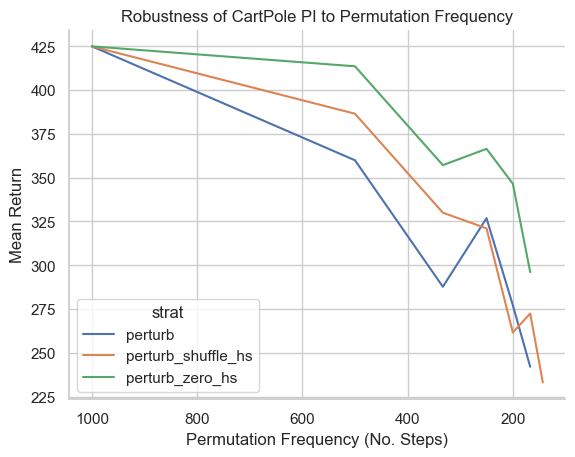

In [49]:
from matplotlib import pyplot as plt
# Convert results to DataFrame and save
perturbed_df = pd.DataFrame(perturbed_results)
# perturbed_df.iloc[-1] = pd.Series({
#     'freq': 1000,
#     'mean': 424.93,
#     'sdom': 77.06,
#     'strat': 'perturb',
#     'seed': 42,
# })
perturbed_df.iloc[-1] = pd.Series({
    'freq': 1000,
    'strat': 'perturb',
    'seed': 42,
    'mean': 424.93,
    'sdom': 77.06,
})
perturbed_df = perturbed_df.sort_values(by=['freq', 'strat'])
# perturbed_df.to_csv("other_perturbed_results.csv", index=False)
noop_df = pd.read_csv("noop_perturbed_results.csv")
op_df = pd.read_csv("other_perturbed_results.csv")
perturbed_df = pd.concat([noop_df, op_df], ignore_index=True)

print(perturbed_df)

# Then create a robustness plot using seaborn
seaborn.set_theme(style="whitegrid")
ax = seaborn.lineplot(
    data=perturbed_df,
    x='freq',
    y='mean',
    hue = 'strat',
    
    markers=True,
    dashes=False
)

# ax.fill_between(perturbed_df["freq"], y1=perturbed_df["mean"] - perturbed_df["sdom"], y2=perturbed_df["mean"] + perturbed_df["sdom"], alpha=.5)
ax.set_title("Robustness of CartPole PI to Permutation Frequency")
ax.set_xlabel("Permutation Frequency (No. Steps)")
ax.set_ylabel("Mean Return")
ax.invert_xaxis()
seaborn.despine()
# seaborn.plt.savefig("perturbation_robustness.png", dpi=300)
plt.show()

      name    mean   sdom
0    clean  424.93  77.06
1  ablated   49.31  11.62


Text(0, 0.5, 'Mean Return')

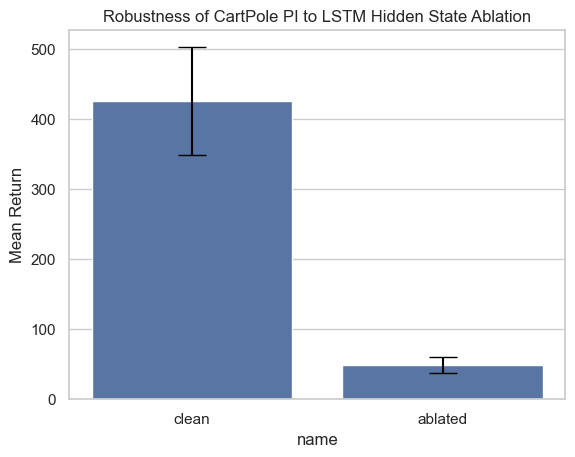

In [42]:
clean_to_ablated_df = pd.DataFrame(
    [
        {'name': 'clean', 'mean': 424.93, 'sdom': 77.06},
        {'name': 'ablated', 'mean': 49.31, 'sdom': 11.62}
    ]
)
print(clean_to_ablated_df)

# Create a barplot from the above DataFrame
ax = seaborn.barplot(
    data=clean_to_ablated_df,
    x='name',
    y='mean',
)

ax.errorbar(
    x=clean_to_ablated_df['name'],
    y=clean_to_ablated_df['mean'],
    yerr=clean_to_ablated_df['sdom'],
    fmt='none',
    c='black',
    capsize=10
)
ax.set_title("Robustness of CartPole PI to LSTM Hidden State Ablation")
ax.set_ylabel("Mean Return")

In [ ]:
import torch
import torch.nn as nn

torch.manual_seed(42)

batch_size, input_size, hidden_size = 256, 5, 6
x = torch.randn(batch_size, input_size)
h = torch.randn(batch_size, hidden_size)
c = torch.randn(batch_size, hidden_size)

lstm = nn.LSTMCell(input_size, hidden_size)

# Unpermuted
h1, c1 = lstm(x, (h, c))

# Permute
perm = torch.randperm(batch_size)
inv_perm = torch.argsort(perm)
print(perm)
print(inv_perm)

x_p = x[perm]
h_p = h[perm]
c_p = c[perm]

h2_p, c2_p = lstm(x_p, (h_p, c_p))

# Unpermute outputs
h2 = h2_p[inv_perm]
c2 = c2_p[inv_perm]

# Compare
print(torch.allclose(h1, h2, atol=1e-6))  # Should be True
print(torch.allclose(c1, c2, atol=1e-6))  # Should be True
